# <center> Lab 02 Part2: Classification, Logistic Regression<br> <small>Réda DEHAK<br> 22 Mai 2020</small> </center>

The goal of this lab is :

- Test the logistic regression on classification problems.

## Part 2: Logistic Regression 
### Import Data

We will use the Wine dataset from UCI. These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of thirteen constituents found in each of the three types of wines.

# Loading and Plotting Data
 
First, we will use only two features from the data set: alcohol and ash (We can plot the solution in 2D space). The labels are supplied as an array of data with values from 1 to 3, but at first, we want a simple binary regression problem with a yes or no answer.  

We filter the data set, reducing it to only include wines with labels 1 or 2.  

In [18]:
%matplotlib inline
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [19]:
import pandas as pd
from sklearn.preprocessing import label_binarize

data = pd.read_csv('data3.txt')

reduced = data[data['class'] <= 2]
X = reduced[['alcohol', 'ash']].to_numpy()
y = label_binarize(reduced['class'].to_numpy(), classes=[1, 2])[:,0]

In [20]:
print(data)

     class  alcohol  malic_acid   ash  alcalinity  magnesium  total_phenols   
0        1    14.23        1.71  2.43        15.6        127           2.80  \
1        1    13.20        1.78  2.14        11.2        100           2.65   
2        1    13.16        2.36  2.67        18.6        101           2.80   
3        1    14.37        1.95  2.50        16.8        113           3.85   
4        1    13.24        2.59  2.87        21.0        118           2.80   
..     ...      ...         ...   ...         ...        ...            ...   
173      3    13.71        5.65  2.45        20.5         95           1.68   
174      3    13.40        3.91  2.48        23.0        102           1.80   
175      3    13.27        4.28  2.26        20.0        120           1.59   
176      3    13.17        2.59  2.37        20.0        120           1.65   
177      3    14.13        4.10  2.74        24.5         96           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

In [21]:
# split data into train and validation set
from sklearn.model_selection import train_test_split

#Fix random_state to have the same split for each run 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)
print('train:', len(Xtrain), 'test:', len(Xtest))

train: 97 test: 33


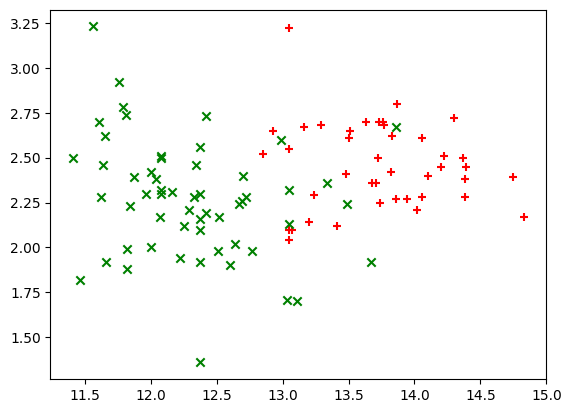

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

MARKERS = ['+', 'x', '.']
COLORS = ['red', 'green', 'blue']

def plot_points(xy, labels):
    
    for i, label in enumerate(set(labels)):
        points = np.array([xy[j,:] for j in range(len(xy)) if labels[j] == label])
        marker = MARKERS[i % len(MARKERS)]
        color = COLORS[i % len(COLORS)]
        plt.scatter(points[:,0], points[:,1], marker=marker, color=color)

plot_points(Xtrain, ytrain)

We can see that we can plot line that could divide the two colored points with a small amount of error.

# Logistic Regression

To implement logistic regression, we need to define the cost function $J(\theta)$, and compute the partial derivatives of $J(\theta)$. As we have seen previously:

$$
J(\theta) =-\frac{1}{N}\sum_{i=1}^{N}y^{i}\log(f_\theta(x^{i}))+(1-y^{i})\log(1-f_\theta(x^{i}))
$$

where $f_\theta(x)$ is the logistic function

$$
f_\theta(x) = \frac{1}{1 + e^{-\theta^Tx}}
$$

- Compute the partiel derivatives of $J(\theta)$ and write the two functions:
    - cost(theta, X, y) which compute the value of $J(\theta)$
    - gradient(theta, X, y) which compute the value of the gradient of $J(\theta)$

In [23]:
def sigmoid(theta, X):
    return 1 / (1 + np.exp(-X @ theta)) # because theta is in column and X is lines, we need to X.T 

def cost(theta, X, y):
    s = 0
    N = len(X)
    
    for i in range(N):
        s += y[i] * np.log(sigmoid(theta, X[i])) + (1 - y[i]) * np.log(1 - sigmoid(theta, X[i]))
    
    return (-1 / N) * s

def gradient(theta, X, y):
    return (1 / len(X)) * (sigmoid(theta, X) - y) @ X

- Using the function scipy.optimize.fmin_tnc which performs a gradient descent algorithm, write a function Train(x, y) which compute $\theta$ that minimize $J(\theta)$

In [24]:
from scipy.optimize import fmin_tnc  

def train(X, y):
    X = np.insert(X, 0, np.ones(len(X)), axis=1)
    theta = np.zeros(X.shape[1])
    result = fmin_tnc(func=cost, x0=theta, args=(X, y), fprime=gradient)
    
    return result[0]

- compute the value of the best $\theta$

In [25]:
bestTheta = train(Xtrain, ytrain)

  NIT   NF   F                       GTG
    0    1  6.931471805599458E-01   4.51418817E-01
    1    3  6.879398176442293E-01   9.68924523E-04
tnc: fscale = 32.1259
    2    5  6.773442725320433E-01   6.87490810E-01
tnc: fscale = 1.20605
    3    7  6.691298688169970E-01   1.14252725E-03
tnc: fscale = 29.5847
    4    9  6.690962822600784E-01   1.73844618E-03
tnc: stepmx = 1000
    5   11  4.652071950856019E-01   1.21825199E-03
    6   13  4.570148132679090E-01   5.12879552E-01
tnc: fscale = 1.39634
    7   15  4.501676467232791E-01   3.21363604E-04
tnc: fscale = 55.783
    8   17  4.501525045432035E-01   8.26722284E-04
    9   21  2.483858956492052E-01   1.05699302E-02
   10   26  2.326180321563047E-01   1.93114621E-03
   11   28  2.325476568187945E-01   3.95935235E-04
   12   30  2.324287858288186E-01   1.07930045E-03
   13   32  2.321942211545867E-01   5.95163167E-04
   14   34  2.279952586437425E-01   1.06675766E-03
   15   36  2.277306827065085E-01   1.91942676E-03
   16   38  2.2

- Plot the boundary and checks that it is linear?

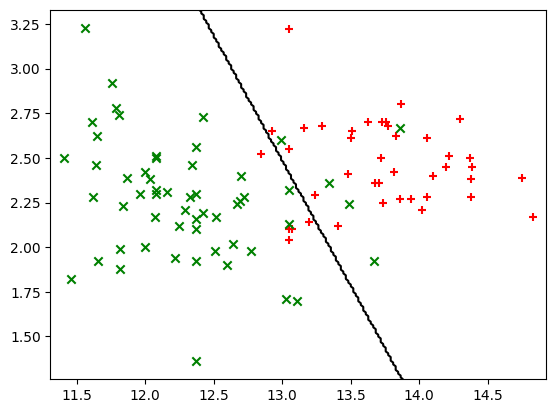

In [26]:
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

def predict(theta, X):
    X = np.insert(X, 0, np.ones(len(X)), axis=1)
    return sigmoid(theta, X) >= 0.5
    
def plot_boundary(X, pred):
    
    x_min, x_max = X[:,0].min() - .1, X[:,0].max() + .1
    y_min, y_max = X[:,1].min() - .1, X[:,1].max() + .1
    
    xs, ys = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    xys = np.column_stack([xs.ravel(), ys.ravel()])
    zs = pred(xys).reshape(xs.shape)
    plt.contour(xs, ys, zs, colors='black')
  
plot_boundary(Xtrain, lambda x: predict(bestTheta, x))
plot_points(Xtrain, ytrain)

- Using sklearn.metrics, compute the confusion matrix, the accuracy, the precision and the recall of this classifier

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

predictions = predict(bestTheta, Xtest)
print(confusion_matrix(predictions, ytest))
print('accuracy:',  accuracy_score(  y_pred=predictions, y_true=ytest  ))
print('precision:', precision_score( y_pred=predictions, y_true=ytest  ))
print('recall:',    recall_score(    y_pred=predictions, y_true=ytest  ))

[[18  0]
 [ 0 15]]
accuracy: 1.0
precision: 1.0
recall: 1.0


- How can we obtain a quadratic boundary? check it and plot the boundary?

[31.78645531  0.26501443  1.84042339 -1.70920983 -6.992593   10.54540311
 31.78645531]


/var/folders/y1/hqbknbks74q1n06g4p7jklqm0000gn/T/ipykernel_17437/3210574701.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.vstack((el[0] ** 2, el[1] ** 2, el[0] * el[1], el[0], el[1], 1) for el in x)
  NIT   NF   F                       GTG
    0    1  6.931471805599458E-01   1.72356260E+01
    1    7  2.360124575030349E-01   4.25347892E+00
    2   14  2.230182317863319E-01   3.86025443E-02
    3   17  2.229997595309362E-01   1.33398043E-03
tnc: fscale = 27.3795
    4   21  2.224105695844820E-01   2.56320341E-02
    5   24  2.223999811088762E-01   1.64253308E-06
tnc: fscale = 780.266
    6   28  2.223933218423029E-01   1.56290323E-05
    7   32  2.223743562877532E-01   7.51226840E-04
tnc: fscale = 36.485
    8   36  2.223478559460856E-01   8.36911789E-03
/var/folders/y1/hqbknbks74q1n06g4p7jklqm0000gn/T/i

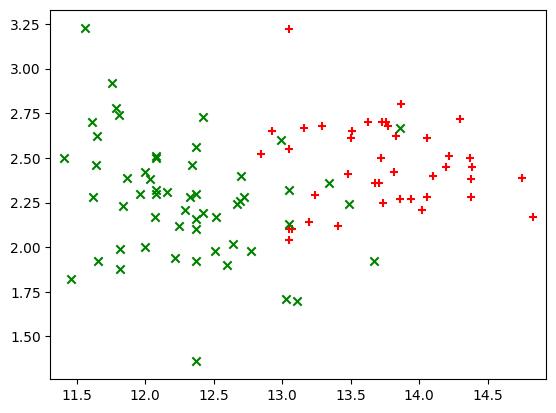

In [28]:
from sklearn.preprocessing import PolynomialFeatures

def transform(x):
    #return PolynomialFeatures(2).fit_transform(x)
    return np.vstack((el[0] ** 2, el[1] ** 2, el[0] * el[1], el[0], el[1], 1) for el in x)

W = train(transform(Xtrain), ytrain)
print(W)
plot_points(Xtrain, ytrain)
plot_boundary(Xtrain, lambda x: predict(W[-3::], x))

- Compute the confusion matrix, the accuracy, the precision and the recall of this classifier

In [29]:
predictions = predict(W[-3::], Xtest)

print(confusion_matrix(predictions, ytest))
print('accuracy:',  accuracy_score(  y_pred=predictions, y_true=ytest  ))
print('precision:', precision_score( y_pred=predictions, y_true=ytest  ))
print('recall:',    recall_score(    y_pred=predictions, y_true=ytest  ))

[[ 0  0]
 [18 15]]
accuracy: 0.45454545454545453
precision: 0.45454545454545453
recall: 1.0


# Multinomial Logistic Regression

The next step is something more interesting: we use a similar set of two features from the data set (this time alcohol and flavanoids), but with all three labels instead of two.

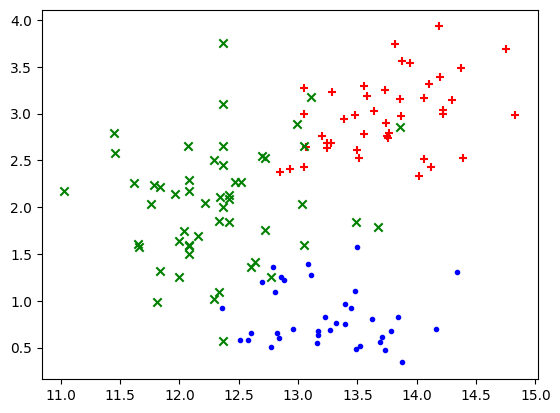

In [30]:
X = data[['alcohol', 'flavanoids']].to_numpy()
y = data[['class']].to_numpy()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)
ytrain = label_binarize(ytrain, classes=[1, 2, 3])
plot_points(Xtrain, ytrain.argmax(axis=1))

The plotted data points again suggest some obvious linear boundaries between the three classes.

We can solve this problem as three one-vs-all problems, and re-use all the previous code. In this part, we will try another solution inspired from softmax function known as softmax regression (See C.Bishop, "Pattern Recognition and Machine Learning", 2006, Springer).

$$
SoftMax_\Theta(x, k) = \frac{e^{\theta_k^Tx}}{\sum\limits_{c=1}^K e^{\theta_c^Tx}}
$$

The cost function is defined as follows:

$$
J(\Theta) =-\frac{1}{N}\sum_{i=1}^{N}\sum_{k=1}^3\left[y_k^{i}\log\left(SoftMax_\Theta\left(x^{i}, k\right)\right)\right]
$$

- Propose a solution using the SoftMax function and test it with linear and quadratic separator? 

In [33]:
def softmax(w, x):
    w = w.reshape((3, 3))
    res = np.exp(w.T @ x)
    return res / np.sum(res)
    
def cost(w, x, y):
    N = len(x)
    s = 0
    for i in range(N):
        for k in range(3):
            s += y[i][k] * np.log(softmax(w, x[i])[k])
    return (- 1 / N) * s

def grad(w, x, y):
    p = np.array([softmax(w, x[i]) for i in range(len(x))])
    return - 1 / len(x) * (x.T @ (y - p))

def train(X, y):
    X = np.insert(X, 0, np.ones(len(X)), axis=1)
    theta = np.zeros((X.shape[1], y.shape[1]))
    result = fmin_tnc(func=cost, x0=theta, args=(X, y), fprime=grad)
    
    # fmin_tnc transforms theta into a vector so we need to reshape it into a matrix
    #theta = theta.reshape(X.shape[1], y.shape[1])
    
    return result[0].reshape((X.shape[1], -1))

#Linear Separator
W1 = train(Xtrain, ytrain)
print(W1)

#Quadratic Separator
#W2 = train(...)
#print(W2)

  NIT   NF   F                       GTG
    0    1  1.098612288668108E+00   1.07006000E+00
tnc: stepmx = 1000
    1    6  6.543365721187916E-01   4.08048776E-01
    2   11  3.831465126883216E-01   6.96748288E-01
    3   18  3.429463840194136E-01   1.15542921E-02
    4   22  3.409554854258046E-01   3.21655855E-04
tnc: fscale = 55.7576
    5   27  2.620303868642918E-01   3.57455022E-04
    6   30  2.554925995820142E-01   4.57675559E-03
    7   38  2.281406374019324E-01   2.60332543E-03
    8   43  2.212141194918542E-01   4.19716575E-04
    9   48  2.205647235358870E-01   1.13902415E-04
   10   52  2.203059813795050E-01   1.56025021E-04
   11   57  2.199846320648343E-01   3.28155623E-05
   12   64  2.184159086214197E-01   2.53055476E-04
   13   67  2.183831797637227E-01   2.22956977E-05
   14   72  2.181275876716667E-01   1.79735592E-05
   15   77  2.170171851915698E-01   1.38999134E-04
   16   80  2.166840076380172E-01   1.05024589E-03
   17   85  2.150446155513318E-01   6.97105460E-04


[[-2.12304172e+01  3.93898907e+01 -2.61482862e+01]
 [ 1.03412457e+00 -3.19545590e+00  2.66773033e+00]
 [ 2.02192876e+00 -3.85140265e-02 -7.48848657e+00]]


   20   99  2.148249264305115E-01   3.33337813E-07
   20  100  2.148249264305115E-01   3.33337813E-07
tnc: Maximum number of function evaluations reached


ValueError: cannot reshape array of size 120000 into shape (200,200)

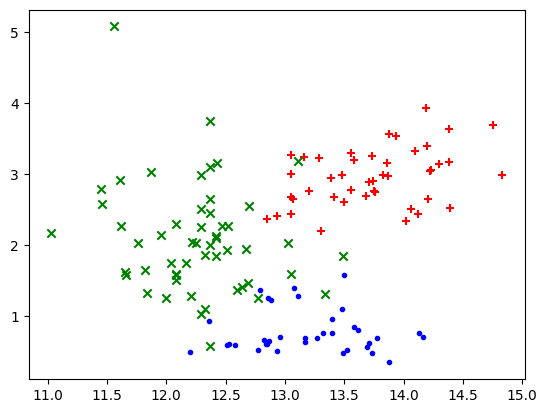

In [77]:
#Linear Separator

def predict_multi(x, w):
    X = np.insert(x, 0, np.ones(len(x)), axis=1)
    return softmax(w, X) >= 0.5

plot_points(Xtrain, ytrain.argmax(axis=1))
plot_boundary(Xtrain, lambda x: predict_multi(x, W1))

In [ ]:
# Quadratic Separator
...

plot_points(Xtrain, ytrain.argmax(axis=1))
plot_boundary(Xtrain, lambda x: ...)

- Compute the confusion matrix, the accuracy, the precision and the recall of these classifiers

- Conclude?